## 1. What is Simple Linear Regression
***

Linear Regression Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. 

<b>Simple</b> Linear Regression model employs one independent and <b>one</b> dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data. 
Independent variable is the variable whose value does not change by the effect of other variables. It is denoted as <b>X</b>.
Dependent variable is the one whose value changes when there is a change in the value of the independent variable. It is denoted by <b>Y</b>.

Linear regression can be used in various fields, for example, in Machine Learning Algorithms, like, predicting a country's economic growth or GDP, prediction of a price change in future on a specific product, estimates used in sports, like, a certain team or person's performance, score, etc.

<b>Regression equation</b>

In its simplest form, the formula for the Simple Linear Regression is:

y = m*x + c, where

y - dependent variable

x - independent 

m - slope of the line

c - intercept of the line.

In simple terms, intercept  c is the point where the regression line crosses the y axis and the slope m means that for every 1 change of x there is times change of y (for example, if m = 3 that means that for every 1 change of x there is 3 times as much change of y).

See drawing below.
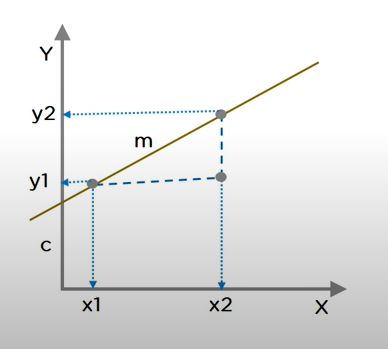


In the drawing above, the the intercept is positive, but it can be negative as well, crossing the y line below zero.
The bigger the slope value is, the steeper the graph line is directed towards the top. On the other hand, the smaller the value, the more it is going to be directed towards the ground. It can be zero as well, then the regression line will be parallel to the x axis, or even negative. Then the regression line will point downwards and will cross the x axis at some point.

Values m and c can be readily computed using particular formulae, that require to have values of x and y (and to compute their square roots subsequently) and the total number n of valuables. We believe and hope that showing these formulae is outside of scope of our project.

As the line will not go through all the data points on the chart, Simple Linear Regression equation should also take into account the <b>residual errors</b>, that are calculated by comparing and analysing the distance between predicted y values (brown dots on the chart below) and the actual ones (blue dots). <i>"The best fit line"</i> should then be adjusted to have the least sum of squares of these errors (ordinary least squares method).

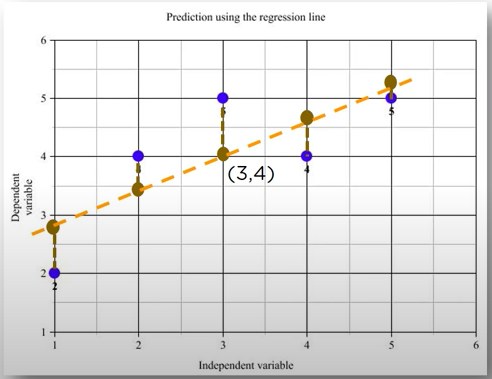

### 2. Simple Linear Regression plotting in Python

### 2.1 DataFrame scatter plot
***

Now we will produce a scatter plot for the powerproduction dataframe, we will use the file that we have downloaded previously from the Moodle page and saved as a csv.file in the same folder where our jupyter Notebook file is kept.

(reference: https://www.techwalla.com/articles/how-to-save-a-text-file-as-csv)

We need to import necessary libraries first of all


In [9]:
import numpy as np # provides operating functions and fast numerical array structure
import pandas as pd # provides tools for data storage, manipulation and analysis tasks
import matplotlib.pyplot as plt # provides tools for making plots

In [10]:
# create a DataFrame by importing our csv file 
df = pd.read_csv("powerproduction.csv")

In [11]:
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


We can see that the DataFrame has 500 rows and 2 columns, so purely technically it is suitable for Simple Linear Regression, where we can use first column (speed) as the independent variable x and then use the 2nd column (power) as the dependent variable y and then analysing the character of correlation between the two.

The way the dataframe is shown in Jupyter notebook by Pandas now is that we can only see its first 5 rows and last 5 rows.
In these rows all the POWER values equal to zero, irrespective of SPEED values. Looking at and analysing these rows alone, there, obviously, does not seem to be any correlation between the two values, that is POWER values do not seem to DEPEND on SPEED values.
Let us call out some other rows to have a look at their values. 

In [12]:
# calling rows 200 to 250 (iloc function - calling by indices)  
# (Reference - Pandas plotting tutorial w/ Tatplotlib and Pandas   https://www.youtube.com/watch?v=0P7QnIQDBJY)
df.iloc[200:251]

,speed,power
200,10.185,22.305
201,10.210,20.704
202,10.235,30.341
203,10.260,24.293
204,10.285,20.636
205,10.360,28.181
206,10.385,22.216
207,10.485,13.520
208,10.511,0.000
209,10.561,22.758


Now we can see some kind of correlation - the POWER values generally seem to increase when SPEED value increases. General sense nfrom our life experience tells us that that would be somehow expected.
That kind of "increase - increase" correlation would give us positive slope, that is, when Simple Linear Regression is plotted, the graph line should go up from left to right.

Now we will try and plot <b>all</b> the DataFrame.

In [13]:
# We have already imported all the necessary libraries.
# Let us only add matplotlib "magic function" be able to call out the plot without plt.show() function
%matplotlib inline

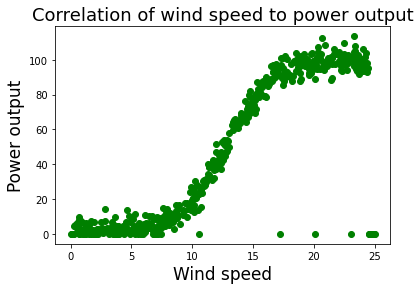

In [19]:
plt.title("Correlation of wind speed to power output",fontsize=18)   # Title of the plot
plt.xlabel("Wind speed",fontsize=17)   # independent variable - Wind speed
plt.ylabel("Power output",fontsize=17)  # dependent variable - Power output
plt.scatter(df.speed,df.power, color="green");   # scatter plotting.   ";" in the end to cancel PathCollection line

### 2.2 Simple Linear Regression Modelling
***

In [20]:
# Importing linear_model from scikit-learn library
from sklearn import linear_model

First we create Linear Regression object.
We will draw sklearn.linear_model.Linear_Regression(). It applies Ordinary Least Squares algorithm in its model, 
(calculates minimum sum of squares between the actual targets and the predicted by the model ones).

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression


In [29]:
reg = linear_model.LinearRegression()     


Now we fit out data, that is we train the Regression model using available datapoints 

Reference: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [30]:
reg.fit(df[["speed"]],df.power)

LinearRegression()

#### Now we are going to predict our Simple Linear Regresion line

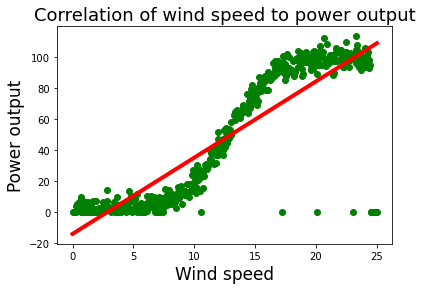

In [38]:
# We draw our scatter plot again
plt.title("Correlation of wind speed to power output",fontsize=18)   # Title of the plot
plt.xlabel("Wind speed",fontsize=17)   # independent variable - Wind speed
plt.ylabel("Power output",fontsize=17)  # dependent variable - Power output
plt.scatter(df.speed,df.power, color="green");   # scatter plotting.   ";" in the end to cancel PathCollection line

# Model has processed the data and trained itself, now we use predict() function to draw a Simple Linear Regression Line.
plt.plot(df.speed,reg.predict(df[["speed"]]),color="red",linewidth=4);


### 2.3. How accurate is the model?

Now that we have modelled the prediction, let us see how accurate it is.

In [39]:
# One of the parameters to evaluate the accuracy of the prediction is the parameter called SCORE
reg.score(df[["speed"]],df.power)

0.7289360258564073